### About this Dataset
- The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

- It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

### The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [8]:
df.isnull().sum().sum()

0

In [10]:
df = df.drop(['Id'], axis =1)

In [17]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### There are three different types of Iris flowers, these are : 
- Setosa
- Versicolor
- Virginica

### Visualisation of species sepal length and width in centimeters

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1143d7f60>,
      dtype=object)

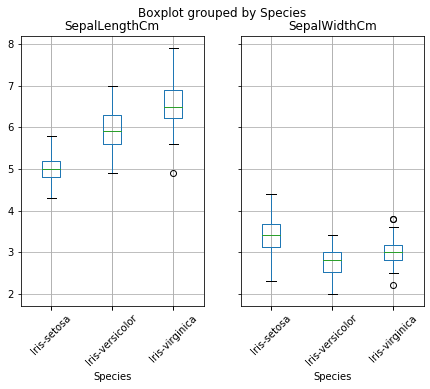

In [28]:
df.boxplot(by= 'Species', column=["SepalLengthCm", "SepalWidthCm"], figsize = (7,5), rot=45)

### Insights

- From the first plot above we can see that setosa has the smallest sepal length followed by versicolor and virginica has the largest sepal length.
- The second plot above shows that setosa has the largest sepal width and versicolor has the smallest sepal width. Virginica is in the middle of setosa and verisicolor but has outliers.

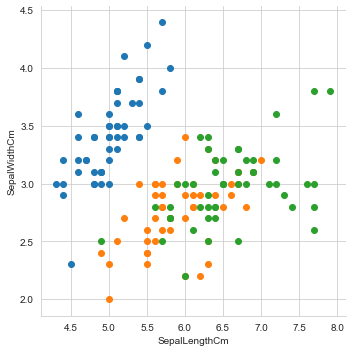

In [40]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1145a8518>,
      dtype=object)

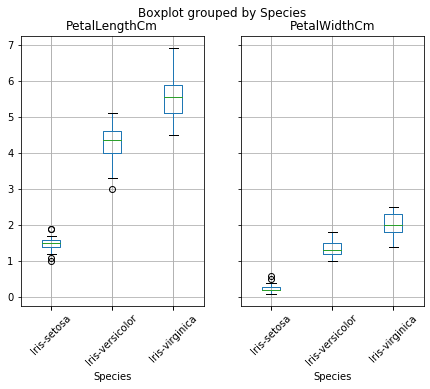

In [29]:
df.boxplot(by= 'Species', column=["PetalLengthCm", "PetalWidthCm"], figsize = (7,5), rot=45)

### Insights

- From the plot above we can see that setosa has the smallest petal length followed by versicolor then virginica.
- The second plot above shows that setosa has the smallest petal width followed by versicolor then virginica

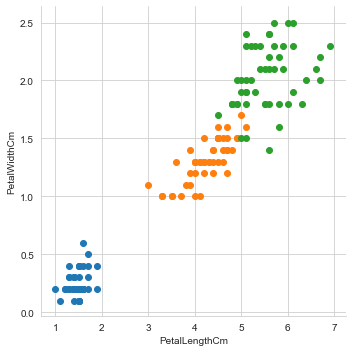

In [41]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm")

### From the above plots I can make an assumption regarding how many clusters I will need for a k means clustering model but to prove how many clusters I will need I will use a elbow plot.

### What is K-Means clustering

- K-Means clustering is an unsupervised learning technique used in processes such as market segmentation, document clustering, image segmentation and image compression.

### Usually we do K-Means clustering to: 

- Understand the structure of the data, and group similar observations.

- Cluster the data into subgroups and then do different predictions on the different subgroups. If we think that subgroup behaviours differ substantially, then we will get more accurate models by making separate models for each subgroup, than one model for all groups.

In [59]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

### I will first do some feature engineering then I will split my data into training and testing sets so that I can train my model

In [53]:
feature_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

X = df[feature_cols]
y = df.Species

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### I would like to find out how many clusters I should use, to do this I will create a elbow plot to show me the correct number of clusters to use.

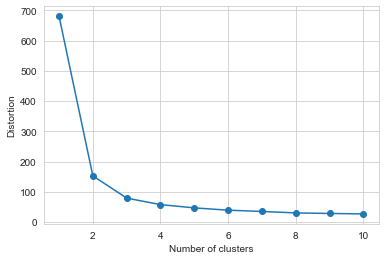

In [60]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Insight
- The plot above shows me that I should use 3 clusters.

In [61]:
km = KMeans(n_clusters=3)

In [64]:
KM_model = km.fit(X)

In [80]:
cluster_c = KM_model.cluster_centers_

print(cluster_c)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


In [75]:
print(KM_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


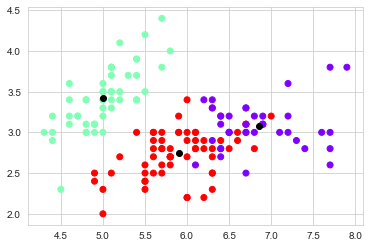

In [79]:
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=KM_model.labels_, cmap='rainbow')
plt.scatter(KM_model.cluster_centers_[:,0] ,KM_model.cluster_centers_[:,1], color='black')

### The above plot is a visual representation of the center of the different clusters